
#### Context
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

#### Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
Inspiration
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

#### Tasks to Solve :
To predict which customer is more likely to purchase the newly introduced travel package
Which variables are most significant.
Which segment of customers should be targeted more.

In [1]:
# IMPORTING THE LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings 

warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df= pd.read_csv(r"C:\Users\PJugantM\Downloads\archive (5)\Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Data cleaning
#### Handling Missing Values 
##### 1- Handling Missing values . 
##### 2- Handling Duplicates .
##### 3- Check data type .
##### 4- Understand the dataset .

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:

# check all the categories 
df['Gender'].value_counts()


Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['TypeofContact'].value_counts() 

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried') 

In [8]:
df['Gender'].value_counts()


Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
# Checking Misiing values 
## these are the features with nan values
## Lets find the percentage of missing values 

features_with_na = [features for features in df.columns if df[features].isnull().sum() >=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5) , '% missing values')




Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [11]:
# statistics on numerical columns (Null cols ) 
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


#### Imputing Null values
##### 1: Impute Median value for Age column .
##### 2. Impute mode for type of contract .
##### 3. Impute median for duration of pitch 
##### 4. Impute mode for NumberofFollowup as it is Discrete feature .
##### 5. Impute mode for preferredPropertyStar
##### 6. Impute median for NumberofTrips.
##### 7. Impute mode for NumberofChildrenVisiting .
##### 8. Impute Median for MonthlyIncome .

In [12]:
#Age 
df.Age.fillna(df.Age.median(),inplace =True)

#TypeofContract 
df.TypeofContact.fillna(df.TypeofContact.mode()[0] , inplace=True)

#DurationOfPitch 
df.DurationOfPitch.fillna(df.DurationOfPitch.median() , inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

#PrefferedPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOf Trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True) 

#NumberOfChildrenVisisting 
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median() , inplace=True)

In [13]:
df.head()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.drop('CustomerID',inplace=True,axis=1) 

### Feature Engineering 
##### Feature Extraction 

In [15]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
#create new column for feature 
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [17]:
## get all the numeric features 
num_features = [feature for feature  in df.columns if df[feature].dtype != 'O']
print("Num of Numerical features :",len(num_features)) 

Num of Numerical features : 12


In [18]:
## Categorical Features 
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features : ' ,len(cat_features)) 

Num of Categorical Features :  6


In [19]:
## Discrete Features 
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <=25]
print('Num of Discrete Features : ' ,len(discrete_features)) 

Num of Discrete Features :  9


In [20]:
## Continuous features 
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features : ' ,len(continuous_features)) 

Num of Continuous Features :  3


### Train Test split and Model training 

In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)


In [24]:
y=df['ProdTaken']

In [25]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [26]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [27]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [28]:
# separate dataset into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [29]:
# Create column Transformer with 3 types of transformers .
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first') 

preprocessor  = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features) ,
        ("StandardScaler",numeric_transformer,num_features)
    ]
)    

In [30]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [31]:
# applying transformation in training
X_train = preprocessor.fit_transform(X_train)


In [32]:
X_test =preprocessor.transform(X_test) 

In [33]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.711858,-0.404857,0.298888,-0.725667,-0.677196,1.57339,0.681916,-1.284154,-0.006331,0.645722
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.711858,0.897627,0.298888,-0.725667,-1.232647,1.57339,1.413008,0.778723,-1.142555,-0.765160
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.711858,-1.115303,-0.710311,-0.725667,0.989158,1.57339,-0.780268,-1.284154,-0.125914,-0.765160
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.711858,-0.523265,0.298888,-0.725667,-0.677196,1.57339,0.681916,-1.284154,-0.153654,-0.765160
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.472030,-1.115303,-0.710311,-0.725667,0.433707,-0.63557,-0.049176,0.778723,-1.054086,-0.765160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.711858,-0.523265,0.298888,-0.725667,-0.677196,-0.63557,-0.049176,0.778723,0.035091,-0.059719
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.711858,2.318518,0.298888,-0.725667,1.544609,-0.63557,1.413008,0.778723,-0.438741,0.645722
3907,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.711858,1.844888,1.308087,1.781941,-0.121745,-0.63557,1.413008,-1.284154,0.366849,2.056604
3908,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.711858,2.200111,1.308087,1.781941,-0.121745,-0.63557,0.681916,0.778723,-0.430307,0.645722


In [34]:
X_test

array([[ 1.        ,  0.        ,  0.        , ...,  0.7787228 ,
        -0.95230991, -1.4706005 ],
       [ 1.        ,  0.        ,  1.        , ...,  0.7787228 ,
         0.74640279, -0.0597189 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.7787228 ,
        -1.2077822 , -1.4706005 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.7787228 ,
         0.06639289,  0.6457219 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.7787228 ,
        -1.20628273, -1.4706005 ],
       [ 1.        ,  1.        ,  0.        , ...,  0.7787228 ,
         2.25243351,  0.6457219 ]])

### APPLY Machine learning training (random forest classifier)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report , ConfusionMatrixDisplay,\
                       precision_score ,recall_score ,f1_score ,roc_auc_score,roc_curve
                            

In [44]:
models ={
    "Logistic Regression ": LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier() ,
    "Random Forest":RandomForestClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # Train model 


    # Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Trainnig set performance 
    model_train_accuracy = accuracy_score(y_train , y_train_pred) 
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train ,y_train_pred)

    #Testset performance 
    model_test_accuracy = accuracy_score(y_test,y_test_pred) 
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred) 
    model_test_recall = recall_score(y_test ,y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    print("Model Performance for Training set")
    print("- Acccuracy : {:.4f}".format(model_train_accuracy))
    print("- F1 score :{:.4f}".format(model_train_f1))

    print("- Precision:{:.4f}".format(model_train_precision))
    print("- Recall:{:.4f}".format(model_train_recall))
    print("- Roc Auc Score :{:.4f}".format(model_train_rocauc_score))
    
    print(" -------------------------------------------------------- ")
    print("Model Perfoemance for Test set")
    print("- Acccuracy : {:.4f}".format(model_test_accuracy))
    print("- F1 score :{:.4f}".format(model_test_f1))

    print("- Precision:{:.4f}".format(model_test_precision))
    print("- Recall:{:.4f}".format(model_test_recall))
    print("- Roc Auc Score :{:.4f}".format(model_test_rocauc_score)) 

    print("="*35)
    print("\n")


Logistic Regression 
Model Performance for Training set
- Acccuracy : 0.8412
- F1 score :0.8140
- Precision:0.6901
- Recall:0.2919
- Roc Auc Score :0.6306
 -------------------------------------------------------- 
Model Perfoemance for Test set
- Acccuracy : 0.8497
- F1 score :0.8241
- Precision:0.7143
- Recall:0.3056
- Roc Auc Score :0.6390


Decision Tree
Model Performance for Training set
- Acccuracy : 1.0000
- F1 score :1.0000
- Precision:1.0000
- Recall:1.0000
- Roc Auc Score :1.0000
 -------------------------------------------------------- 
Model Perfoemance for Test set
- Acccuracy : 0.9059
- F1 score :0.9067
- Precision:0.7340
- Recall:0.7667
- Roc Auc Score :0.8520


Random Forest
Model Performance for Training set
- Acccuracy : 1.0000
- F1 score :1.0000
- Precision:1.0000
- Recall:1.0000
- Roc Auc Score :1.0000
 -------------------------------------------------------- 
Model Perfoemance for Test set
- Acccuracy : 0.9243
- F1 score :0.9184
- Precision:0.9344
- Recall:0.6333
- 

In [45]:
# Hyperparameter tuning 
rf_params = {"max_depth" :[5,8,15,None,10],
             "max_features" :[5,7,"auto",8],
             "min_samples_split":[2,8,15,20],
             "n_estimators":[100,200,500,1000]
}

In [46]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [47]:
# Models list for Hyperpartameter tuning 
randomcv_models=[
    ("RF" ,RandomForestClassifier() ,rf_params),
    
]

In [48]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [50]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name , model ,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] =random.best_params_
for model_name in model_param:
    print(f"---------------------Best Params for {model_name}-----------------")
    print(model_param[model_name])



Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------Best Params for RF-----------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [53]:
models ={
    
    "Random Forest":RandomForestClassifier(n_estimators= 1000, 
                                           min_samples_split= 2,
                                           max_features =8, 
                                           max_depth = None)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # Train model 


    # Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Trainnig set performance 
    model_train_accuracy = accuracy_score(y_train , y_train_pred) 
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train ,y_train_pred)

    #Testset performance 
    model_test_accuracy = accuracy_score(y_test,y_test_pred) 
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred) 
    model_test_recall = recall_score(y_test ,y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    print("Model Performance for Training set")
    print("- Acccuracy : {:.4f}".format(model_train_accuracy))
    print("- F1 score :{:.4f}".format(model_train_f1))

    print("- Precision:{:.4f}".format(model_train_precision))
    print("- Recall:{:.4f}".format(model_train_recall))
    print("- Roc Auc Score :{:.4f}".format(model_train_rocauc_score))
    
    print(" -------------------------------------------------------- ")
    print("Model Perfoemance for Test set")
    print("- Acccuracy : {:.4f}".format(model_test_accuracy))
    print("- F1 score :{:.4f}".format(model_test_f1))

    print("- Precision:{:.4f}".format(model_test_precision))
    print("- Recall:{:.4f}".format(model_test_recall))
    print("- Roc Auc Score :{:.4f}".format(model_test_rocauc_score)) 

    print("="*35)
    print("\n")


Random Forest
Model Performance for Training set
- Acccuracy : 1.0000
- F1 score :1.0000
- Precision:1.0000
- Recall:1.0000
- Roc Auc Score :1.0000
 -------------------------------------------------------- 
Model Perfoemance for Test set
- Acccuracy : 0.9346
- F1 score :0.9305
- Precision:0.9394
- Recall:0.6889
- Roc Auc Score :0.8394




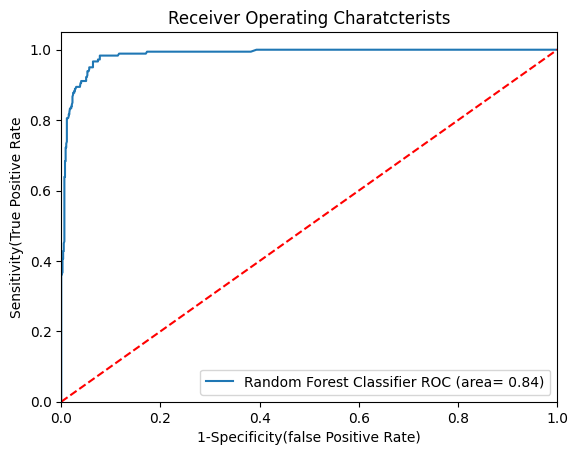

In [56]:
## PLOT THE ROC AUC curve 
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure() 

# Add the models to the list that you want to view on the ROC plot 
auc_models =[
    {
        'label':'Random Forest Classifier' ,
        'model':RandomForestClassifier(n_estimators= 1000, 
                                           min_samples_split= 2,
                                           max_features =8, 
                                           max_depth = None),
        'auc':0.8394
    },
]

# create loop through all model 
for algo in auc_models:
    model=algo['model'] # select the model 
    model.fit(X_train,y_train) # train the model 
# compute false positive rate and True positive rate 
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
# calculate the area under the curve to display on the plot 
    plt.plot(fpr,tpr,label='%s ROC (area= %0.2f)' % (algo['label'],algo['auc']))
#custom settings for the plot 
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(false Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate')
plt.title('Receiver Operating Charatcterists')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()